In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [2]:
df_rice_y = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_crop_yield.csv")
df_fert_use = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_fertilizer_usage.csv")
df_cropland = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_cropland.csv")
df_energy = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_energy_usage.csv")
df_pop = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_urban_rural_pop.csv")
df_water = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_water_usage.csv")
df_pesticide = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_usage.csv")
df_pesticide_imports = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_imports.csv")
df_air_dep = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_air_deposition_nitrogen.csv")

In [3]:
df_CHINA = pd.DataFrame()
df_CHINA["Yield"] = df_rice_y["China Rice Yield"]
df_CHINA["Cropland"] = df_cropland["China Crop Land"]
df_CHINA["Energy"] = df_energy["China energy/cropland"]
df_CHINA["Fert"] = df_fert_use["China"]
df_CHINA["Rural Pop"] = df_pop["china rural/total"]
df_CHINA["Urban Pop"] = df_pop["china urban/total"]
df_CHINA["Water"] = df_water["wf_tot_m3_t_china"]
df_CHINA["Pesticide"] = df_pesticide["China Pesticide"]
df_CHINA["Pesticide Import"] = df_pesticide_imports["China"]
df_CHINA["Air Deposition of Nitrogen"] = df_air_dep["China Air Deposition of Nitrogen"]

display(df_CHINA)

,Yield,Cropland,Energy,Fert,Rural Pop,Urban Pop,Water,Pesticide,Pesticide Import,Air Deposition of Nitrogen
0,5.7261,132197.0000,1.206837,207.73001,0.736401,0.279189,890.768723,1.17,0.215645,11.9664
1,5.6402,133266.0000,1.344494,224.05000,0.727359,0.287860,885.269949,1.16,0.240862,14.2141
2,5.8031,131583.0000,1.475799,223.41998,0.719333,0.297062,898.767256,1.22,0.298704,14.8489
3,5.8479,130882.0000,1.375437,192.92001,0.710814,0.306296,805.938496,1.30,0.183835,14.9227
4,5.8311,130879.0000,1.512929,221.86002,0.701727,0.315568,880.222719,1.49,0.244652,15.4838
5,6.0248,130880.0000,1.695083,273.69000,0.692283,0.324932,835.552767,1.64,0.265224,17.6927
6,6.2122,130918.0000,1.796355,276.71002,0.682552,0.334424,785.533086,1.72,0.245271,19.0250
7,6.3192,130910.2500,1.862850,274.12000,0.672531,0.343964,784.756988,1.80,0.371123,21.4721
8,6.3662,130904.5000,1.772399,275.53000,0.662242,0.353597,772.858095,1.84,0.337444,22.0087
9,6.3447,130900.7500,1.876170,280.21000,0.651855,0.363371,737.439921,1.99,0.364502,22.2367


In [4]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_CHINA,["Energy","Fert","Rural Pop", "Urban Pop", "Water","Pesticide", "Pesticide Import", "Air Deposition of Nitrogen"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

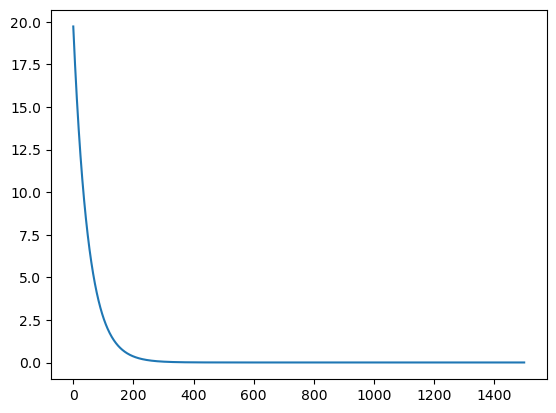

In [5]:
plt.plot(J_storage)

In [6]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 8
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.9560159119487676
adj_r_squared: 0.9528458875847148
mse: 0.006648046463082005
mae: 0.061874378613553285


In [7]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[6.36916854]
 [6.89664893]
 [6.89195941]
 [6.22821538]
 [5.99477218]
 [6.19768302]
 [6.85759991]
 [6.8757536 ]
 [6.12646078]]
     Yield
9   6.3447
26  6.8657
28  7.0266
13  6.0607
5   6.0248
12  6.1890
27  6.9169
25  6.8913
6   6.2122
      Energy       Fert  Rural Pop  Urban Pop       Water  Pesticide  \
9   1.876170  280.21000   0.651855   0.363371  737.439921       1.99   
26  3.085513  413.56998   0.427296   0.573698  717.313818       2.58   
28  3.541767  387.34000   0.402504   0.596028  715.306389       2.28   
13  1.947942  299.72998   0.601400   0.411548  820.113603       1.96   
5   1.695083  273.69000   0.692283   0.324932  835.552767       1.64   
12  1.716978  305.04000   0.615021   0.398181  794.678535       1.95   
27  3.336837  404.70000   0.414563   0.584806  725.787876       2.48   
25  2.925186  421.53000   0.439993   0.562195  699.881962       2.63   
6   1.796355  276.71002   0.682552   0.334424  785.533086       1.72   

    Pesticide Import  Air Deposition of Ni

In [8]:
###28  7.0266
###28  3.541767  387.34000   0.402504   0.596028  715.306389       2.28          0.612035                     23.8721 

country_yield = 7.0266
energy = 3.541767
fert_use = 387.34000
rural_pop = 0.402504
urban_pop = 0.596028
water = 715.306389
pesticide = 2.28
pesticide_imports = 0.612035
air_dep = 23.8721 

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta):
    energy_n = normalise(energy, means[0],stds[0])
    fert_use_n = normalise(fert_use ,means[1],stds[1])
    rural_pop_n = normalise(rural_pop ,means[2],stds[2]) 
    urban_pop_n = normalise(urban_pop ,means[3],stds[3])
    water_n = normalise(water ,means[4],stds[4])
    pesticide_n = normalise(pesticide, means[5], stds[5])
    pesticide_imports_n = normalise(pesticide_imports, means[6],stds[6])
    air_dep_n = normalise(air_dep, means[7],stds[7])
    y = beta[0] + beta[1]*energy_n + beta[2]*fert_use_n + beta[3]*rural_pop_n + beta[4]*urban_pop_n + beta[5]*water_n + beta[6]*pesticide_n + beta[7]*pesticide_imports_n + beta[8]*air_dep_n
    return y

print(get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta))

[6.89195926]
